In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [49]:
data = pd.read_excel("mtcars.xlsx")

In [50]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.629274,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.579639,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.629274,0.579639,1.000000,0.503159,-0.514281,0.710122,-0.206063,-0.465399,-0.399187,-0.396687,0.291430
hp,-0.776168,0.832447,0.503159,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.514281,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.710122,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.206063,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.465399,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.399187,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.396687,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


cyl disp hp drat wt qsec vs am gear carb 

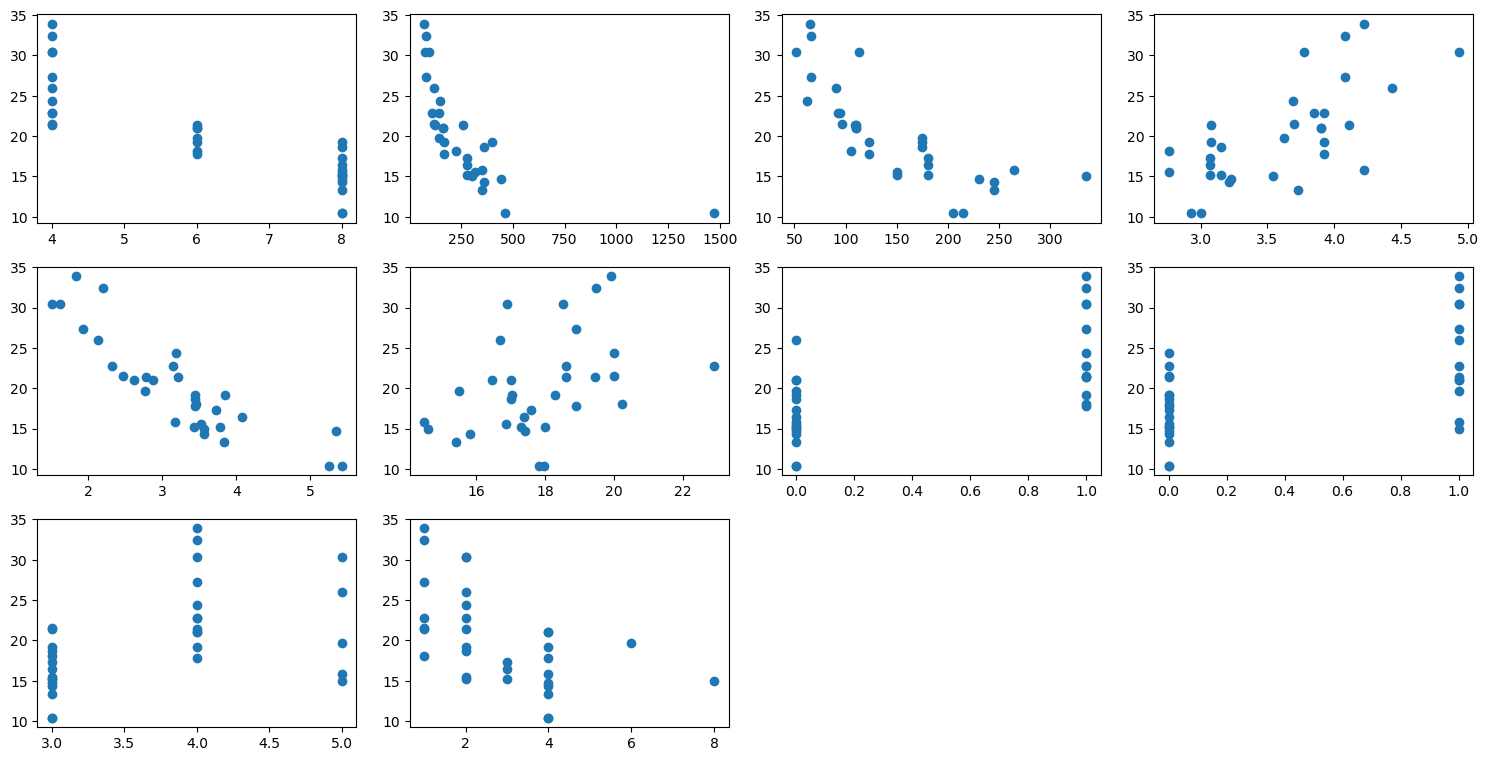

In [51]:
plt.figure(figsize=(15, 10)) 
cnt = 1 
for column in data.columns: 
    if column != 'mpg': 
        plt.subplot(4, 4, cnt) 
        plt.scatter(data[column], data['mpg']) 
        plt.title = (f'{column} vs mpg') 
        plt.xlabel = (column) 
        plt.ylabel = ('mpg') 
        cnt += 1
        print(column , end= " ")

plt.tight_layout() # Adjust subplots to fit in figure area 
plt.show()

In [52]:
#According to scatter plots mpg columns shows linear relation with disp , hp , drat , wt columns

Y = data["mpg"]
Y = pd.DataFrame(Y , columns = ["mpg"])

X = data.drop(["mpg"] , axis = 1)

Box plot before handling Outliers


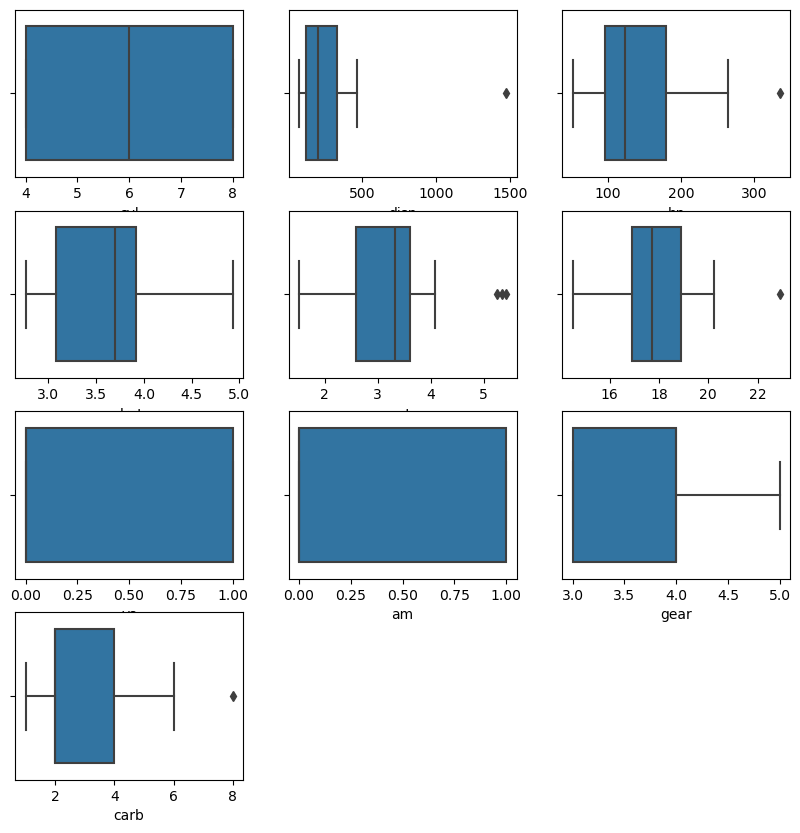

In [53]:
print("Box plot before handling Outliers")
plt.figure(figsize=(10,10))
cnt=0
for each_col in X:
    cnt+=1
    plt.subplot(4,3,cnt)
    sns.boxplot(x=X[each_col])
    plt.title=each_col

In [54]:
for i in X.columns:
    q1=X[i].quantile(0.25)
    q3=X[i].quantile(0.75)
    
    IQR=q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    
    higher_outliers = X[X[i]>upper_bound]
    higher_outliers = higher_outliers[i].values
    X[i] = X[i].replace({}.fromkeys(higher_outliers,upper_bound))
    
    lower_outliers = X[X[i]<lower_bound]
    lower_outliers = lower_outliers[i].values
    X[i] = X[i].replace({}.fromkeys(lower_outliers,lower_bound))

Box plot after handling Outliers


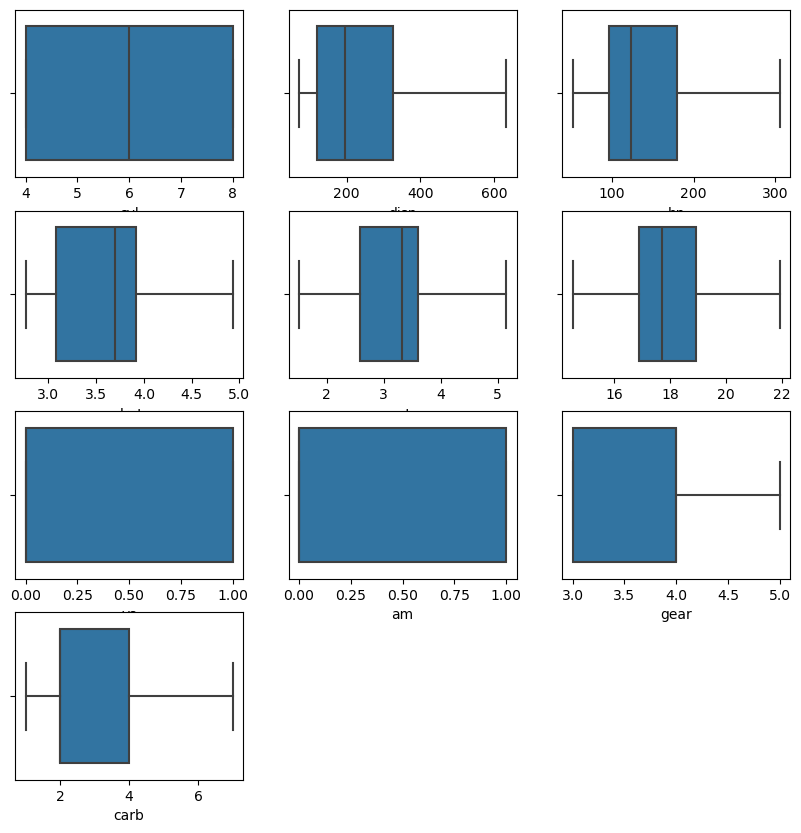

In [55]:
print("Box plot after handling Outliers")
plt.figure(figsize=(10,10))
cnt=0
for each_col in X:
    cnt+=1
    plt.subplot(4,3,cnt)
    sns.boxplot(x=X[each_col])
    plt.title=each_col

In [56]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 1)
X_train

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,4,71.1000,65.00,4.22,1.835000,19.90000,1,1,4,1
14,8,633.7625,205.00,2.93,5.153125,17.98000,0,0,3,4
24,8,400.0000,175.00,3.08,3.845000,17.05000,0,0,3,2
10,6,167.6000,123.00,3.92,3.440000,18.90000,1,0,4,4
20,4,120.1000,97.00,3.70,2.465000,20.01000,1,0,3,1
26,4,120.3000,91.00,4.43,2.140000,16.70000,0,1,5,2
4,8,360.0000,175.00,3.15,3.440000,17.02000,0,0,3,2
2,4,108.0000,93.00,3.85,2.320000,18.61000,1,1,4,1
25,4,79.0000,66.00,4.08,1.935000,18.90000,1,1,4,1
6,8,360.0000,245.00,3.21,3.570000,15.84000,0,0,3,4


In [57]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
sgd = SGDRegressor(max_iter=200 ,learning_rate="constant")

In [60]:
sgd.fit(X_train,Y_train)

C:\Users\naage\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naage\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=200)

In [61]:
Y_pred = sgd.predict(X_test)

In [62]:
print("Actual values:" , Y_test.values)
print("Predicted values:" , Y_pred)

Actual values: [[30.4]
 [21.4]
 [15.2]
 [30.4]
 [13.3]
 [32.4]
 [15.5]
 [15.8]]
Predicted values: [23.78730755 19.21479044 17.8331703  30.07377442 15.17317273 27.44265162
 15.57790266 21.82629109]


In [63]:
mse = mean_squared_error( Y_test , Y_pred )
rmse = np.sqrt(mse)

mae = mean_absolute_error( Y_test , Y_pred )

r2 = r2_score( Y_test , Y_pred )

print("Mean squared error:" , mse)
print("Root Mean Squared error:" , rmse)
print("Mean Absolute error:" , mae)
print("R2 score:" , r2)

Mean squared error: 14.993647913231833
Root Mean Squared error: 3.872163208496232
Mean Absolute error: 3.086501592131307
R2 score: 0.7345904692971308
